# ライフゲーム Conway's Game of Life

仮定
* 各セルは状態“生”と“死”をもつ
* 誕生，生存，死亡のプロセスを経て，“生”と“死”の状態を更新する
* ８近傍のセルの状態により次の状態がきまる
* 遷移ルールは誕生，維持，過疎，過密の４つ
    * 誕生：８近傍中ちょうど３つが“生”ならば次のステップで“生”
    * 維持：８近傍中ちょうど2つが“生”ならば次のステップで更新なし（“生”ならば“生”，“死”ならば“死”）
    * 過疎：８近傍中“生”が１つ以下ならば次のステップで“死”
    * 過密：８近傍中“生”が４つ以上ならば次のステップで“死”

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## 擬似コード

In [ ]:
def 遷移ルール(3x3の配列（注目するセルとその８近傍）):
    近傍の“生”（1）のセルの数を計算する（np.sumを使ってみよう）
    
    近傍の“生”のセルがちょうど２つならば:
        次世代の（中心の）セルの状態は更新なし
    （２ではなく）近傍の“生”のセルがちょうど3つならば:
        次世代の（中心の）セルの状態は“生”
    それ以外の場合（過疎，過密）:
        次世代の（中心の）セルの状態は“死”
        
    return 次世代の（中心の）セルの状態

In [ ]:
# 初期条件の設定
* 場のサイズを設定（縦，横にそれぞれ何個セルが配置されるか？）
* 何世代目まで計算するか？
* 場を記録するリストの準備
* 場の初期値の設定（例．ランダム，特定パタンの配置など）

for 世代:
    # 状態遷移
    次世代の場を記録する配列の用意
    
    for i in 場のサイズ（縦）:
        for j in 場のサイズ（横）:
            # 境界条件等による分岐
            # 全部で9通り（メイン+境界条件）
            もしi==0ならば:
                もしj==0ならば:
                    次世代の場[i,j] = 遷移ルール(場[[-1,0,1],:][:,[-1,0,1]])
                （j==0でなく）もし0<j<場のサイズ（横）-1ならば:
                    次世代の場[i,j] = 遷移ルール(場[[-1,0,1],:][:,[j-1,j,j+1]])
                （j<場のサイズ（横）-1でなく）もしj==場のサイズ（横）-1ならば:
                    …
            （i==0でなく）もし0<i<場のサイズ（縦）-1ならば:
                …
            （i<場のサイズ（縦）-1でなく）もしi==場のサイズ（縦）-1ならば:
                …
    
    場の更新（次世代を現世代にコピー, np.copyを使ってみよう）
    場の記録（リストへ追加）

## パタンの例

In [2]:
# グライダー
ptn_glider = np.array([[1,1,1],[1,0,0],[0,1,0]],dtype=int)

# 回転花火
ptn_pinwheel = np.array([
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
], dtype=int)

# グライダー銃
ptn_glidergun = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=int)

# パン屋
ptn_baker = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=int)

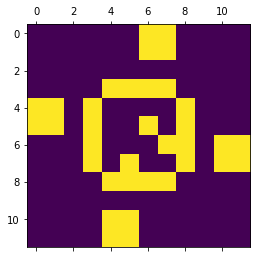

In [3]:
plt.matshow(ptn_pinwheel)

## 可視化

In [5]:
field_list = np.load("./sample_CGL.npy")

In [6]:
field_list[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

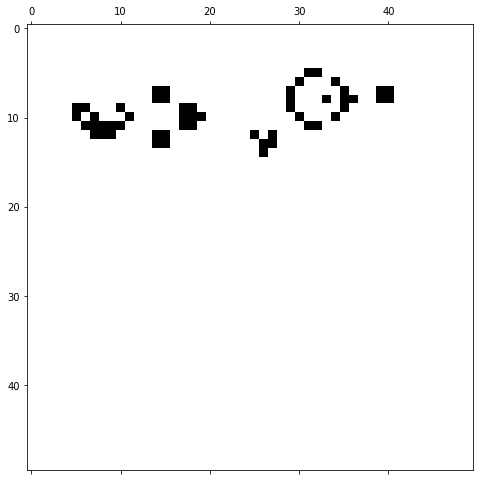

In [7]:
# セルオートマトンの可視化
plt.figure(figsize=(8,8))
plt.matshow(field_list[20], fignum=1, cmap="binary")

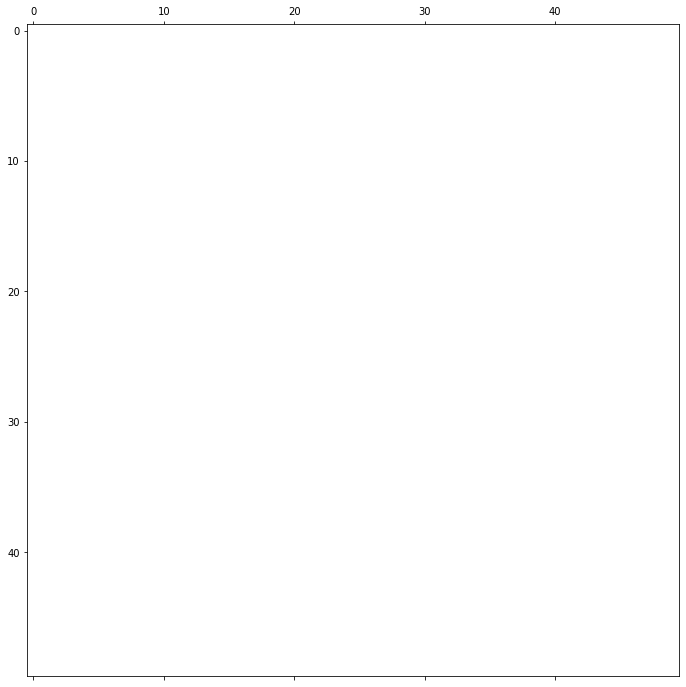

In [8]:
fig, ax = plt.subplots(figsize=(12,12));

artists = []

for i in range(len(field_list)):
    im = ax.matshow(field_list[i], interpolation='none',cmap="binary");

    ax.set_aspect('equal')
    artists.append([im])

ani = animation.ArtistAnimation(fig, artists, interval=100);

HTML(ani.to_jshtml())

In [18]:
HTML(anim.to_jshtml())

## LifeWikiのパタンファイルの読み込み
[LifeWiki](http://www.conwaylife.com/wiki/Main_Page)にはいろいろなパタンを記録したファイルがある．
ここではPlainText形式でのファイルを読み込み，配列に変換する関数を与える．

In [1]:
import re, os

In [2]:
# filepath = "./CGL_patterns/gosperglidergun.cells"
# filepath = "./CGL_patterns/pinwheel.cells"
PARENT_DIR = "./CGL_patterns/"

In [6]:
def cvtChar2Int(character):
    if character == ".":
        return 0
    elif character == "O":
        return 1
    else:
        return -1

def loadPatternFile(filepath):
    txt = []
    with open(filepath, "r") as f:
        for row in f:
            txt.append(row)
        
    strPTN = re.compile(r"^(?P<code>[^!]*)\n$")
    ptn_list = []
    for row in txt:
        m = strPTN.match(row)
        if m is not None:
            ptn_list.append([cvtChar2Int(i) for i in list(m["code"])])
    
    pad = len(max(ptn_list, key=len))
    ptn_list = np.array([i + [0]*(pad-len(i)) for i in ptn_list])
    
    return ptn_list

In [7]:
ptn_gosper_glidergun = loadPatternFile(os.path.join(PARENT_DIR,"gosperglidergun.cells"))
ptn_pinwheel = loadPatternFile(os.path.join(PARENT_DIR,"pinwheel.cells"))
ptn_baker =loadPatternFile(os.path.join(PARENT_DIR,"baker.cells"))